In [1]:
import torch
model = torch.hub.load('RF5/danbooru-pretrained', 'resnet50')

Downloading: "https://github.com/RF5/danbooru-pretrained/archive/master.zip" to /home/skware/.cache/torch/hub/master.zip
Downloading: "https://github.com/RF5/danbooru-pretrained/releases/download/v0.1/resnet50-13306192.pth" to /home/skware/.cache/torch/hub/checkpoints/resnet50-13306192.pth


In [2]:
print(torch.__version__)

1.5.1


In [3]:
model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [17]:
from PIL import Image
import torch.nn.functional as F
from torchvision import transforms
import os
import random

In [18]:
base_dir ="./data/animepose/images/"
images = os.listdir(base_dir)
filename = base_dir + random.choice(images)

input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(360),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.7137, 0.6628, 0.6519], std=[0.2970, 0.3017, 0.2979]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

In [19]:
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
with torch.no_grad():
    output = model(input_batch)
probs = torch.sigmoid(output[0])

<IPython.core.display.Javascript object>


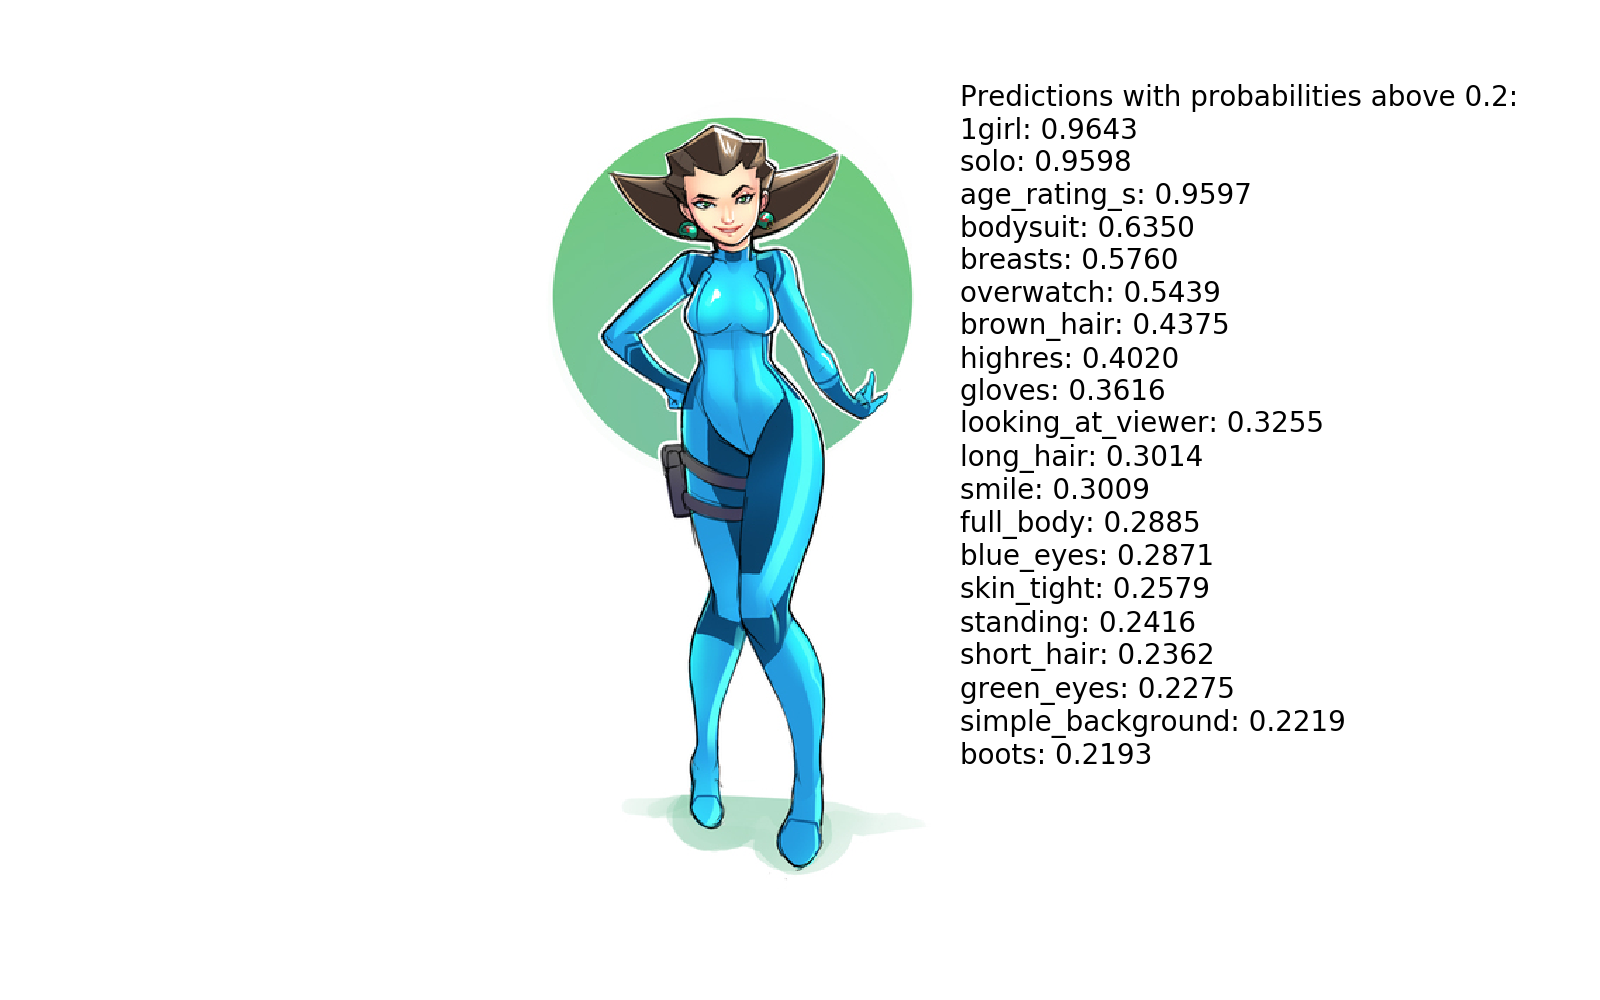

In [20]:
%matplotlib notebook
import urllib, urllib.request
import matplotlib.pyplot as plt
import json
with urllib.request.urlopen("https://github.com/RF5/danbooru-pretrained/raw/master/config/class_names_6000.json") as url:
    class_names = json.loads(url.read().decode())
plt.figure(figsize=(8,5))
plt.imshow(input_image)
plt.grid(False)
plt.axis('off')

def plot_text(thresh=0.2):
    tmp = probs[probs > thresh]
    inds = probs.argsort(descending=True)
    txt = 'Predictions with probabilities above ' + str(thresh) + ':\n'
    for i in inds[0:len(tmp)]:
        txt += class_names[i] + ': {:.4f} \n'.format(probs[i].cpu().numpy())
    plt.text(input_image.size[0]*1.05, input_image.size[1]*0.85, txt)

plot_text()
plt.tight_layout()
plt.show()